In [ ]:
# Discription: Use the realtive strength index (RSI) and Python to determine if a stock is being over bought or over sold

In [ ]:
# If a stock over sold then it is good time to bought, and over bought then it is good time to sell the stock
# A common time period to know the RSI is 14 days, and RSI returns a values from 1 to 100
# High and Lw values are marked as 70-30, 80-20 or 90-10
# If RSI is about 70 then the stock is over bought and below 30 then it is over sold


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
# Load the data 
from google.colab import files
uploaded  = files.upload()

Saving AXISBANK1.csv to AXISBANK1.csv


In [ ]:
# Store the data
FB = pd.read_csv('AXISBANK.csv')
FB

In [ ]:
# Set the date as index for the date
FB = FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB

In [ ]:
#Visually show the price 
plt.figure(figsize=(12.2, 4.5))
plt.plot(FB.index, FB['Close'], label = 'Close Price(rupies)')
plt.title('Close Price history')
plt.xlabel('Time period', fontsize = 18)
plt.ylabel('Close price', fontsize = 18)
plt.show()


In [30]:
# Prepare the date to calculate the RSI
# Get the difference in the price from the previous day thats why diff(1)

delta = FB['Close'].diff(1)
delta

2000-01-03      NaN
2000-01-04     0.15
2000-01-05    -0.55
2000-01-06    -0.35
2000-01-07    -1.15
              ...  
2021-04-26    29.10
2021-04-27    -0.90
2021-04-28     8.60
2021-04-29    11.25
2021-04-30    -4.50
Name: Close, Length: 5306, dtype: float64

In [ ]:
# Get rid of the NAN in the date of delta
delta = delta.dropna()
delta

In [12]:
# Get the positive gains (up) and the Negative gains (down)

up = delta.copy()
down = delta.copy()
up[up < 0] = 0              # if the values are less the 0 then it is termed as 0
down[down > 0] = 0          # if the values are more the 0 then it is termed as 0

In [16]:
# Get the time peroid --> for RSI we use inly the 14 days time period

period = 14

#Calcluate the Avg gain and the Avg loss

AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [18]:
# Calculate the RSI --> we need first the RS (Relative strength)
# Relative strenght(RS)

RS = AVG_Gain/AVG_Loss

#Calculate the RSI
RSI = 100.0 - (100.0/(1.0+RS))


In [ ]:
#Show the RSI visually

plt.figure(figsize=(22.2, 4.5))
RSI.plot()
plt.show()

In [ ]:
#Put it all together 
# Creat a new DATA frame
new_df = pd.DataFrame()
new_df['Close'] = FB['Close']
new_df['RSI'] = RSI
new_df

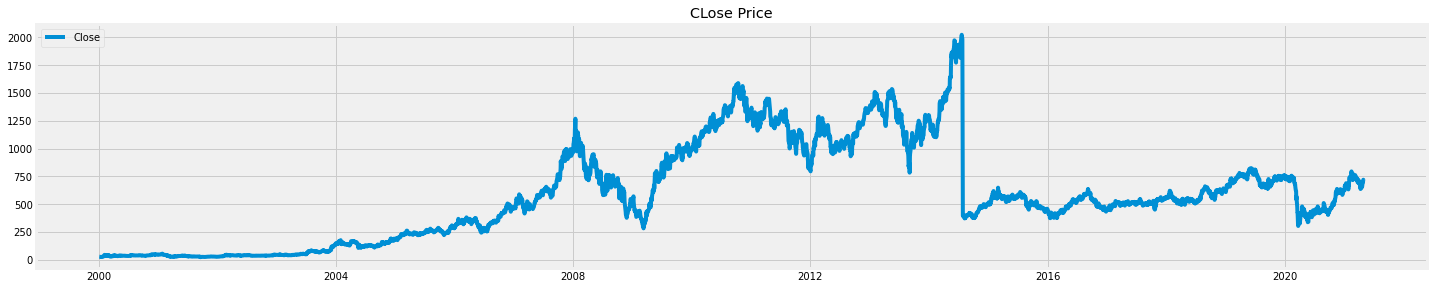

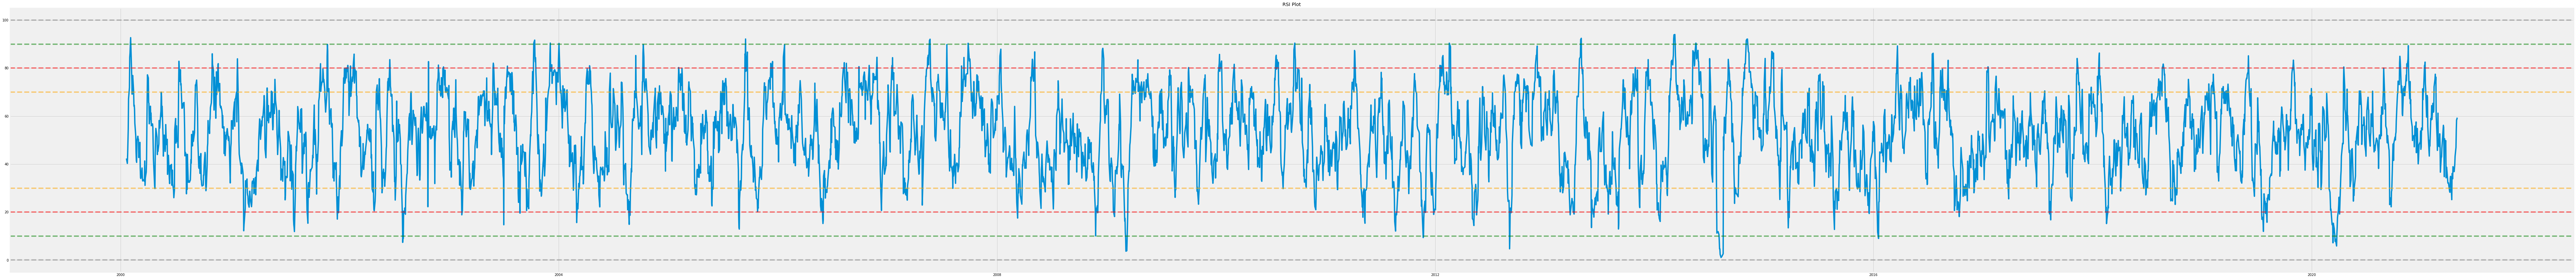

In [34]:
#Visually show the Close price and RSI

# 1-plot the Close price
plt.figure(figsize = (22.2, 4.5))
plt.plot(new_df.index, new_df['Close'])
plt.title('CLose Price')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

# Plot the corresponding RSI valeus and the significant levels
plt.figure(figsize=(122.2, 14.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0 , linestyle = '--', alpha = 0.5, color = 'gray')
plt.axhline(10 , linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(20 , linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(30 , linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(70 , linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(80 , linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(90 , linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(100 , linestyle = '--', alpha = 0.5, color = 'gray')
plt.show()